2.5038189957783423
99425.67567567571
99425.67567567571
271346.12984892185
23411.012629881137
380948.37054094934
-134666.91475809997
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


C:\Users\german.perez\AppData\Local\Temp\ipykernel_7748\3418669060.py:45: RuntimeWarning: invalid value encountered in scalar power
  hext = ((0.825 + ((0.387 * RaL**(1/6)) / ((1 + (0.492 / (1.48e-5 / 2.2e-5))**(9/16))**(8/27))))**2) * (ka / H1)


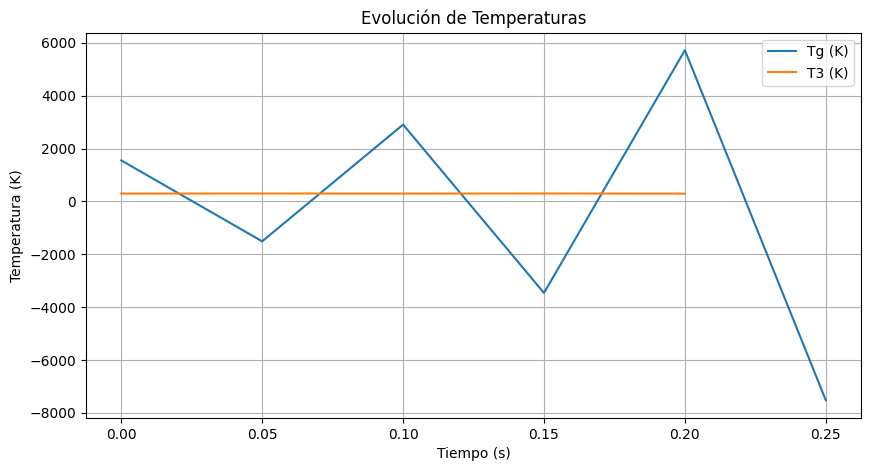

In [123]:
## Solver del modelo con la cámara vacía, solo gases - usando datos reales

import numpy as np
import matplotlib.pyplot as plt

total_time = 100
h = 0.05

# Datos iniciales
r2 = 0.025 # mm
r3 = 0.0265  # Radio del cilindro o superficie de intercambio (m)
k3 = 16
H1 = 0.1  # Altura del sistema (m)
c_g = 33.6861/0.0214717  # Capacidad térmica de T_g a presión constante
c_3 = 480 # J/kgK
rho_g = 10**5 / ((387.2135)*1550.99)
rho3 = 7800 # kg/m³
Cg = c_g * rho_g * np.pi * H1  *r2 ** 2
C3 = c_3 * rho3 * np.pi * H1 * (r3**2 - r2**2)  # Capacidad térmica de T_3
GLg = 300 * (2 * np.pi * H1 * r2)  # Conductancia térmica entre T_g y T_3 (W/m^2K)
GL3 = (2* np.pi *k3*H1)/(np.log((r2+r3)/(2*r2)))* (2 * np.pi * H1 * r2)
GL3g = 1 / ((1/GLg) + (1/GL3))
print(GL3g)
ka = 0.0262  # Conductividad térmica del aire (W/mK)c_2, c_3 = 2300, 480  

g = 9.81  # Gravedad (m/s^2)
Tamb = 295  # Temperatura ambiente (K)
Text = 296  # Temperatura externa (K)
Tg_curr = 1550.99  # Temperatura inicial de T_g (K)
T3_curr = 296  # Temperatura inicial de T_3 (K)

print(((g * 3.3e-3 * H1**3) / (2.2e-5 * 1.48e-5)) * (T3_curr - Tamb))

# Número de pasos
steps = int(total_time / h)

# Almacenar resultados
time_values = [0]
Tg_values = [Tg_curr]
T3_values = [T3_curr]

for step in range(steps):
    T3_curr = T3_values[-1]
    RaL = ((g * 3.3e-3 * H1**3) / (2.2e-5 * 1.48e-5)) * (T3_curr - Tamb)
    hext = ((0.825 + ((0.387 * RaL**(1/6)) / ((1 + (0.492 / (1.48e-5 / 2.2e-5))**(9/16))**(8/27))))**2) * (ka / H1)
    hrad = 0.42 * 5.670374419e-8 * (T3_curr**2 + Tamb**2) * (T3_curr + Tamb)
    Gext = (hrad + hext) * (2 * np.pi * H1 * r3)

    print(RaL)

    # Matriz del sistema
    A = np.array([
        [-GL3g / Cg, GL3g / Cg],
        [GL3g / C3, -(GL3g + Gext) / C3]
    ])

    # Vector de temperaturas actuales
    T_curr = np.array([Tg_curr, T3_curr])

    # Vector de entrada
    B = np.array([0, (Gext / C3) * Text])

    # Cálculo de las temperaturas en el siguiente paso de tiempo
    T_next = (A @ T_curr + B) * h + T_curr
    
    # Actualizar valores
    Tg_curr, T3_curr = T_next
    
    # Guardar valores
    time_values.append((step + 1) * h)
    Tg_values.append(Tg_curr)
    T3_values.append(T3_curr)
    
# Graficar resultados
plt.figure(figsize=(10, 5))
plt.plot(time_values, Tg_values, label='Tg (K)', linestyle='-')
plt.plot(time_values, T3_values, label='T3 (K)', linestyle='-')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (K)')
plt.title('Evolución de Temperaturas')
plt.legend()
plt.grid()
plt.show()
    



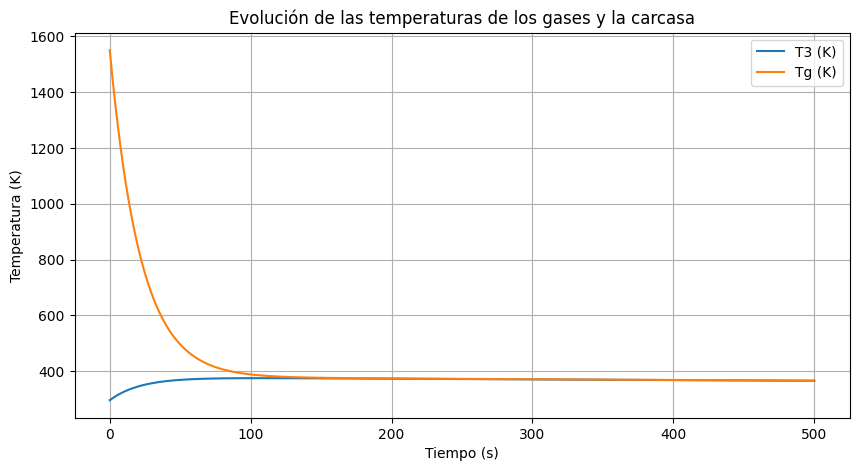

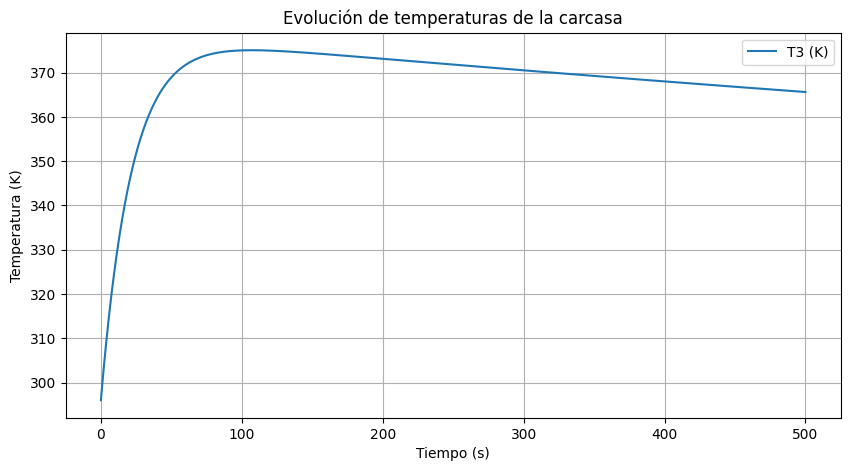

In [ ]:
## Usando los datos inventados que me cuadran

import numpy as np
import matplotlib.pyplot as plt

img_output_path = r"C:/Users/german.perez/OneDrive - Destinus NL BV/Escritorio/Personal/TFG/Fotos/6 - Resultados/"


def simulate_temperature(total_time, h=0.014):
    # Datos iniciales
    Cg = 35  # Capacidad térmica de T_g
    C3 = 500  # Capacidad térmica de T_3
    G_Lg3 = 1.5  # Conductancia térmica entre T_g y T_3 (W/m^2K)
    
    ka = 0.0262  # Conductividad térmica del aire (W/mK)
    H1 = 0.1  # Altura del sistema (m)
    r3 = 0.0265  # Radio del cilindro o superficie de intercambio (m)
    g = 9.81  # Gravedad (m/s^2)
    Tamb = 296  # Temperatura ambiente (K)
    Text = 296  # Temperatura externa (K)
    Tg_curr = 1550  # Temperatura inicial de T_g (K)
    T3_curr = 296  # Temperatura inicial de T_3 (K)
    
    # Número de pasos
    steps = int(total_time / h)
    
    # Almacenar resultados
    time_values = [0]
    Tg_values = [Tg_curr]
    T3_values = [T3_curr]
    
    for step in range(steps):
        # Cálculo de RaL
        RaL = ((g * 3.3e-3 * H1**3) / (2.2e-5 * 1.48e-5)) * (T3_curr - Tamb)

        # Cálculo de hext
        hext = ((0.825 + ((0.387 * RaL**(1/6)) / ((1 + (0.492 / (1.48e-5 / 2.2e-5))**(9/16))**(8/27))))**2) * (ka / H1)

        # Cálculo de hrad
        hrad = 0.42 * 5.670374419e-8 * (T3_curr**2 + Tamb**2) * (T3_curr + Tamb)

        # Cálculo de Gext
        Gext = (hrad + hext) * (2 * np.pi * H1 * r3)

        # Matriz del sistema
        A = np.array([
            [-G_Lg3 / Cg, G_Lg3 / Cg],
            [G_Lg3 / C3, -(G_Lg3 + Gext) / C3]
        ])

        # Vector de temperaturas actuales
        T_curr = np.array([Tg_curr, T3_curr])

        # Vector de entrada
        B = np.array([0, (Gext / C3) * Text])

        # Cálculo de las temperaturas en el siguiente paso de tiempo
        T_next = (A @ T_curr + B) * h + T_curr
        
        # Actualizar valores
        Tg_curr, T3_curr = T_next
        
        # Guardar valores
        time_values.append((step + 1) * h)
        Tg_values.append(Tg_curr)
        T3_values.append(T3_curr)
    
    # Graficar resultados
    plt.figure(figsize=(10, 5))
    plt.plot(time_values, T3_values, label='T3 (K)', linestyle='-')
    plt.plot(time_values, Tg_values, label='Tg (K)', linestyle='-')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Temperatura (K)')
    plt.title('Evolución de las temperaturas de los gases y la carcasa')
    plt.savefig(img_output_path + '06 - Temp gas y Carcasa.png')
    plt.legend()
    plt.grid()
    plt.show()

    # Graficar resultados
    plt.figure(figsize=(10, 5))
    #plt.plot(time_values, Tg_values, label='Tg (K)', linestyle='-')
    plt.plot(time_values, T3_values, label='T3 (K)', linestyle='-')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Temperatura (K)')
    plt.title('Evolución de temperaturas de la carcasa')
    plt.savefig(img_output_path + '06 - Temp Carcasa.png')
    plt.legend()
    plt.grid()
    plt.show()

# Definir el tiempo total de simulación en segundos
total_time = 500 # Puedes cambiarlo
simulate_temperature(total_time)


<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
C:\Users\german.perez\AppData\Local\Temp\ipykernel_7748\2047703478.py:13: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, sep='\s+', decimal='.', header=None)


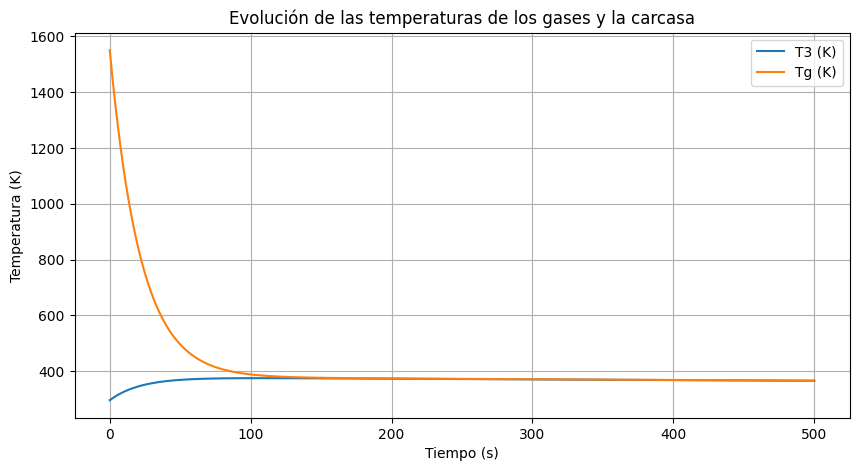

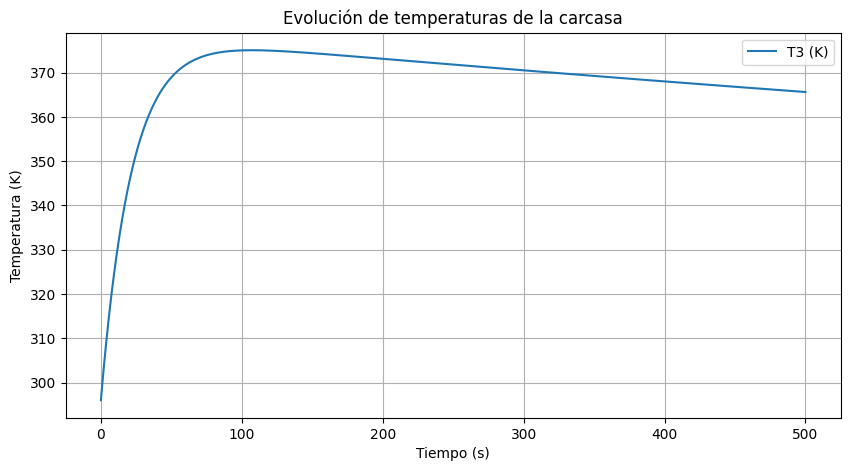

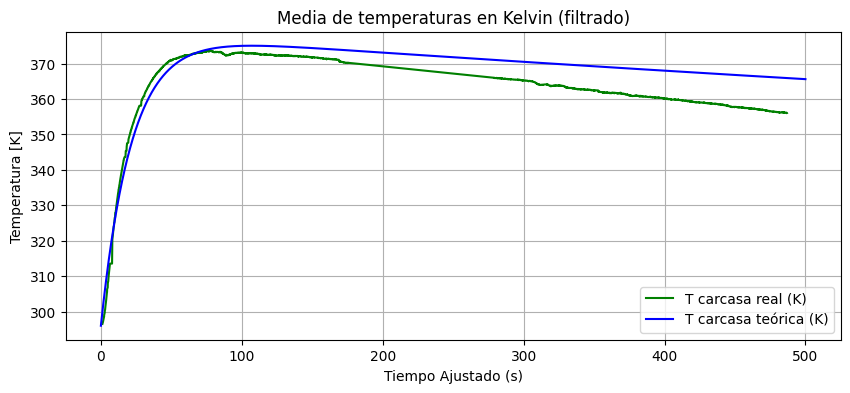

In [129]:
# coparacion con temperaturas medidas en el ensayo

import pandas as pd
import matplotlib.pyplot as plt

# Extraer fotos
img_output_path = r"C:/Users/german.perez/OneDrive - Destinus NL BV/Escritorio/Personal/TFG/Fotos/6 - Resultados/"

# Define la ruta del archivo
file_path = r"C:\Users\german.perez\OneDrive - Destinus NL BV\Escritorio\Personal\TFG\code\EnsayoCJ_V2_M\Datos BREDA 2.txt"

# Lee los datos asumiendo espacio como separador y punto como decimal
df = pd.read_csv(file_path, sep='\s+', decimal='.', header=None)

# Define los nombres correctos de las columnas
column_names = ['Tiempo', 'Empuje', 'Presión'] + [f'Termopar {i}' for i in range(1, 8)]
df.columns = column_names

# Convierte las columnas numéricas a tipo float
df = df.astype(float)

# Filtra los datos a partir del segundo 15
df_filtered = df[df['Tiempo'] >= 15].copy()

# Ajusta el tiempo restando 14 segundos para que el nuevo tiempo comience en 0
df_filtered['Tiempo Ajustado'] = df_filtered['Tiempo'] - 14

# Convierte la temperatura del Termopar 1 a Kelvin
df_filtered['Termopar (K)'] = df_filtered['Termopar 1'] + 273.15

# Suaviza la curva con un filtro de media móvil (ventana de 10 puntos)
window_size = 10  # Puedes ajustar el tamaño de la ventana según el nivel de suavizado deseado
df_filtered['Termopar (K) Suavizado'] = df_filtered['Termopar (K)'].rolling(window=window_size, center=True).mean()



def simulate_temperature(total_time, h=0.014):
    # Datos iniciales
    '''
    Cg = 11  # Capacidad térmica de T_g
    C3 = 90862  # Capacidad térmica de T_3
    G_Lg3 = 2.5  # Conductancia térmica entre T_g y T_3 (W/m^2K)
    '''
    
    Cg = 35  # Capacidad térmica de T_g
    C3 = 500  # Capacidad térmica de T_3
    G_Lg3 = 1.5  # Conductancia térmica entre T_g y T_3 (W/m^2K)
    '''
    Cg = 30  # Capacidad térmica de T_g
    C3 = 500  # Capacidad térmica de T_3
    G_Lg3 = 6  # Conductancia térmica entre T_g y T_3 (W/m^2K)
    '''
    ka = 0.0262  # Conductividad térmica del aire (W/mK)
    H1 = 0.1  # Altura del sistema (m)
    r3 = 0.0265  # Radio del cilindro o superficie de intercambio (m)
    g = 9.81  # Gravedad (m/s^2)
    Tamb = 296  # Temperatura ambiente (K)
    Text = 296  # Temperatura externa (K)
    Tg_curr = 1550  # Temperatura inicial de T_g (K)
    T3_curr = 296  # Temperatura inicial de T_3 (K)
    
    # Número de pasos
    steps = int(total_time / h)
    
    # Almacenar resultados
    time_values = [0]
    Tg_values = [Tg_curr]
    T3_values = [T3_curr]
    
    for step in range(steps):
        # Cálculo de RaL
        RaL = ((g * 3.3e-3 * H1**3) / (2.2e-5 * 1.48e-5)) * (T3_curr - Tamb)

        # Cálculo de hext
        hext = ((0.825 + ((0.387 * RaL**(1/6)) / ((1 + (0.492 / (1.48e-5 / 2.2e-5))**(9/16))**(8/27))))**2) * (ka / H1)

        # Cálculo de hrad
        hrad = 0.42 * 5.670374419e-8 * (T3_curr**2 + Tamb**2) * (T3_curr + Tamb)

        # Cálculo de Gext
        Gext = (hrad + hext) * (2 * np.pi * H1 * r3)

        # Matriz del sistema
        A = np.array([
            [-G_Lg3 / Cg, G_Lg3 / Cg],
            [G_Lg3 / C3, -(G_Lg3 + Gext) / C3]
        ])

        # Vector de temperaturas actuales
        T_curr = np.array([Tg_curr, T3_curr])

        # Vector de entrada
        B = np.array([0, (Gext / C3) * Text])

        # Cálculo de las temperaturas en el siguiente paso de tiempo
        T_next = (A @ T_curr + B) * h + T_curr
        
        # Actualizar valores
        Tg_curr, T3_curr = T_next
        
        # Guardar valores
        time_values.append((step + 1) * h)
        Tg_values.append(Tg_curr)
        T3_values.append(T3_curr)
    
    # Graficar resultados
    plt.figure(figsize=(10, 5))
    plt.plot(time_values, T3_values, label='T3 (K)', linestyle='-')
    plt.plot(time_values, Tg_values, label='Tg (K)', linestyle='-')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Temperatura (K)')
    plt.title('Evolución de las temperaturas de los gases y la carcasa')
    plt.legend()
    plt.grid()
    plt.savefig(img_output_path + '06 - Temp gas y Carcasa.png')
    plt.show()

    # Graficar resultados
    plt.figure(figsize=(10, 5))
    #plt.plot(time_values, Tg_values, label='Tg (K)', linestyle='-')
    plt.plot(time_values, T3_values, label='T3 (K)', linestyle='-')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Temperatura (K)')
    plt.title('Evolución de temperaturas de la carcasa')
    plt.legend()
    plt.grid()
    plt.savefig(img_output_path + '06 - Temp Carcasa.png')
    plt.show()

    # Grafica la curva suavizada
    plt.figure(figsize=(10, 4))
    plt.plot(df_filtered['Tiempo Ajustado'], df_filtered['Termopar (K) Suavizado'], label='T carcasa real (K)', color='green')
    plt.plot(time_values, T3_values, label='T carcasa teórica (K)', linestyle='-', color='blue')
    plt.xlabel("Tiempo Ajustado (s)")
    plt.ylabel("Temperatura [K]")
    plt.title("Media de temperaturas en Kelvin (filtrado)")
    plt.legend()
    plt.grid()
    plt.savefig(img_output_path + '06 - Temp Carcasa real.png')
    plt.show()


# Definir el tiempo total de simulación en segundos
total_time = 500 # Puedes cambiarlo
simulate_temperature(total_time)

In [127]:
# Datos iniciales
r2 = 0.025 # mm
r3 = 0.0265  # Radio del cilindro o superficie de intercambio (m)
k3 = 16
H1 = 0.1  # Altura del sistema (m)
c_g = 33.6861/0.0214717  # Capacidad térmica de T_g a presión constante
c_3 = 480 # J/kgK
rho_g = 10**5 / ((387.2135)*1550.99)
rho3 = 7800 # kg/m³
Cg = c_g * rho_g * np.pi * H1  *r2 ** 2
C3 = c_3 * rho3 * np.pi * H1 * (r3**2 - r2**2)  # Capacidad térmica de T_3
GLg = 300* (2 * np.pi * H1 * r2)  # Conductancia térmica entre T_g y T_3 (W/m^2K)
GL3 = (2* np.pi *k3*H1)/(np.log((r2+r3)/(2*r2)))* (2 * np.pi * H1 * r2)
GL3g = 1 / ((1/GLg) + (1/GL3))
print(GL3g)

2.5038189957783423
